# Sports top earners

Forbes publishes a list of top earning athletes each year. I have looked at the dataset from 1990 to 2020 and derived insights from the data. In particular, I have answered questions like:

1. Who were the world's highest paid athletes in 2020?
2. A list of top highest paid athlete for each year from 1990 to 2020 and their earnings.
3. Which athletes were among the list for most years?
4. Countries which produced the highest paid athletes.
5. How much did the top paid athlete earn year over year?
6. Which sports produced the top earners?
7. Which athletes appeared the most number of times in the list?
8. Women in the list?
9. Analysis of top three earners of all time.

In [1]:
# loading the data.
import pandas as pd
df = pd.read_csv('forbes_richest_atheletes.csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [2]:
# getting info about the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [3]:
# Convert string to datetime64
df['Year'] = df['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df['year'] = pd.DatetimeIndex(df['Year']).year  
df.set_index('year', inplace=True)
df.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df['Sport'] = df['Sport'].str.upper()
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,,
1990,1,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,2,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,3,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,4,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,5,Alain Prost,France,5,NaN,AUTO RACING,9.0


## 1) Who were the world's highest paid athletes in 2020?

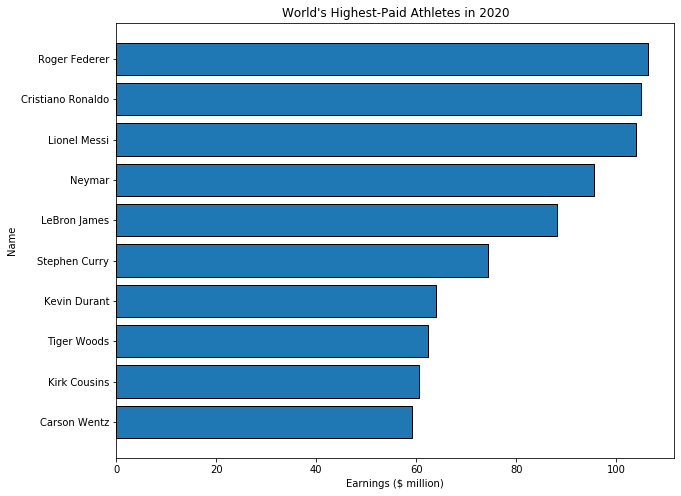

In [5]:
import matplotlib.pyplot as plt


data_2020 = df[df.index == 2020]


plt.figure(figsize=(10, 8))
plt.barh(data_2020['Name'], data_2020["earnings ($ million)"], edgecolor='black')

# Customize the plot
plt.xlabel('Earnings ($ million)')
plt.ylabel('Name')
plt.title("World's Highest-Paid Athletes in 2020")
plt.gca().invert_yaxis()  # Reverse the y-axis to show the highest-paid athlete at the top

# Show the plot
plt.show()

## 2) A list of top highest paid athlete for each year from 1990 to 2020 and their earnings.

In [7]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df[df['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

z.style.background_gradient() 


,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


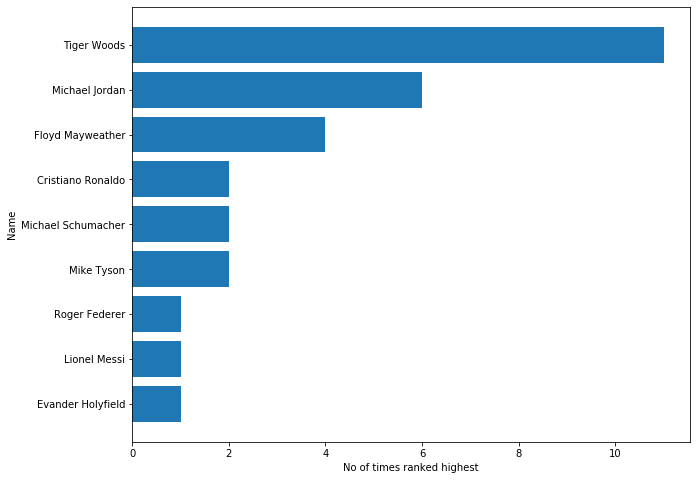

In [9]:
# Count the occurrences of each athlete's name
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(counts_top.index, counts_top['Name'])

# Customize the plot
plt.xlabel('No of times ranked highest')
plt.ylabel('Name')
plt.gca().invert_yaxis()

# Show the plot
plt.show()


## 3) Which athletes were among the list for most years?

In [10]:
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')

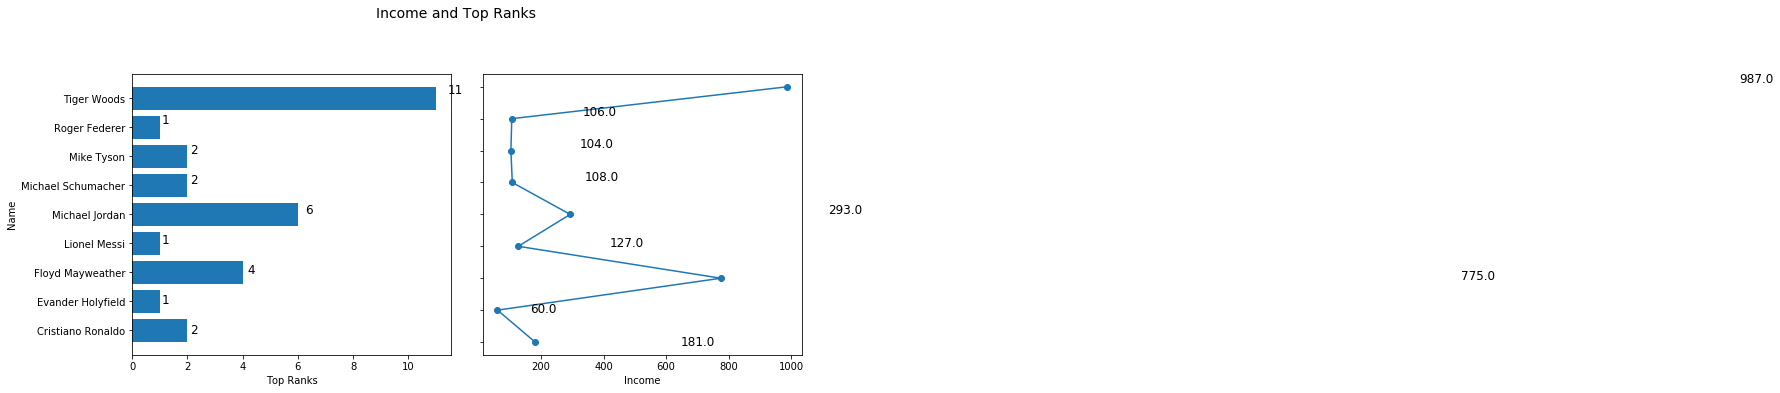

In [12]:
%matplotlib inline
import numpy as np

# Create the first subplot for the bar chart
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)

# Create the bar chart
ax1.barh(df_compare['Name'], df_compare['Rank_counts'])
ax1.set_xlabel('Top Ranks')
ax1.set_ylabel('Name')

# Create the second subplot for the line plot
ax2 = plt.subplot(1, 2, 2)

# Create the line plot
ax2.plot(df_compare['earnings ($ million)'], df_compare['Name'], 'o-')
ax2.set_xlabel('Income')
ax2.set_yticklabels([])  # Hide y-axis labels to match the original plot

# Customize the layout
plt.suptitle('Income and Top Ranks', fontsize=14, y=0.98, va='baseline')
plt.subplots_adjust(wspace=0.1, bottom=0.2, top=0.85)  # Adjust spacing and title position

# Adding annotations to the line plot
for ydn, yd, xd in zip(np.rint(df_compare['earnings ($ million)']), df_compare['Rank_counts'], df_compare['Name']):
    ax2.annotate('{:,}'.format(ydn), xy=(ydn, xd), xytext=(ydn - 1, xd), fontsize=12,
                 textcoords='offset points', ha='right', va='center')
    ax1.annotate(str(yd), xy=(yd, xd), xytext=(yd + 1, xd), fontsize=12,
                 textcoords='offset points', ha='left', va='center')

plt.show()


## 4) Countries which produced the highest paid athletes.

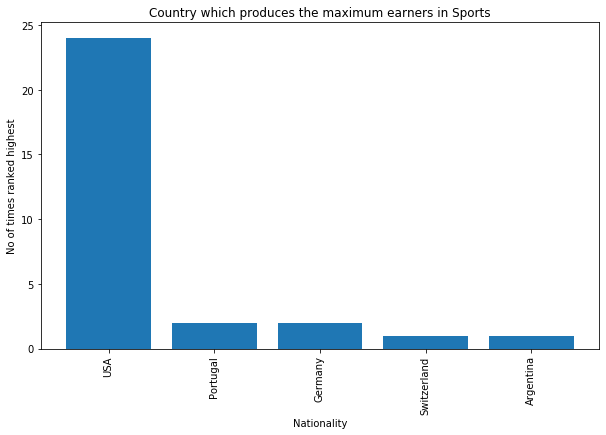

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Top_paid_each_year is a pandas DataFrame containing the data

# Count the occurrences of each nationality
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts_top.index, counts_top['Nationality'])

# Customize the plot
plt.xlabel('Nationality')
plt.ylabel('No of times ranked highest')
plt.title('Country which produces the maximum earners in Sports')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## 5) How much is the highest paid athlete earning each year?

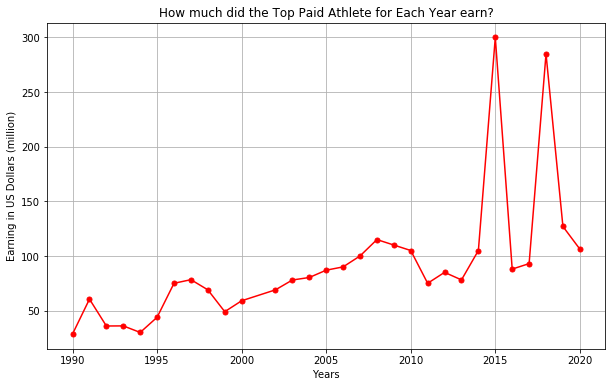

In [14]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(Top_paid_each_year.index, Top_paid_each_year['earnings ($ million)'], color='red', marker='o', markersize=5, linestyle='-')

# Customize the plot
plt.xlabel('Years')
plt.ylabel('Earning in US Dollars (million)')
plt.title('How much did the Top Paid Athlete for Each Year earn?')
plt.grid(True)

# Show the plot
plt.show()


## 6) Which sports produced the top earners?

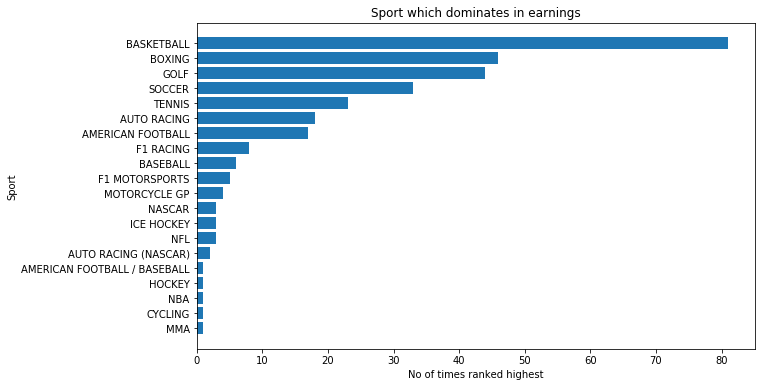

In [15]:
# Count the occurrences of each sport
max_sport = df['Sport'].value_counts().to_frame()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(max_sport.index, max_sport['Sport'])

# Customize the plot
plt.xlabel('No of times ranked highest')
plt.ylabel('Sport')
plt.title('Sport which dominates in earnings')
plt.gca().invert_yaxis()  # Reverse the y-axis to show the sport with the most rankings at the top

# Show the plot
plt.show()


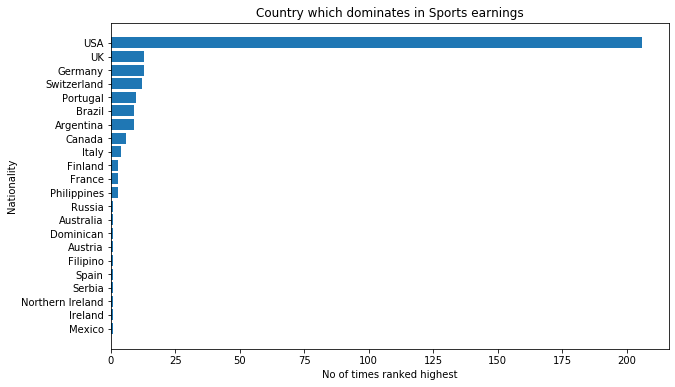

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is a pandas DataFrame containing the data

# Count the occurrences of each nationality
max_sport = df['Nationality'].value_counts().to_frame()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(max_sport.index, max_sport['Nationality'])

# Customize the plot
plt.xlabel('No of times ranked highest')
plt.ylabel('Nationality')
plt.title('Country which dominates in Sports earnings')
plt.gca().invert_yaxis()  # Reverse the y-axis to show the country with the most rankings at the top

# Show the plot
plt.show()


## 7) Which athletes appeared the most number of times in the list?

In [17]:
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13


## 8) Women in the list.

In [18]:
# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,,
1992,30,Monica Seles,USA,10,12,TENNIS,8.500000


## 9) Top 3 earning players of all time.

In [19]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds') 

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


## 10) Showing earnings of Tiger Woods and Cristiano Ronaldo year over year.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def earnings_plot(dataframe, athlete, image_path, opacity):
    """
    function that creates a matplotlib line chart with the image of the athlete in the background
    """
    athlete_df = dataframe[dataframe['Name'] == athlete]

    # Create the line plot
    plt.figure(figsize=(10, 6))
    plt.plot(athlete_df.index, athlete_df['earnings ($ million)'], color='red', marker='o', markersize=5, linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Earnings in US$ (millions)')
    plt.title(f"{athlete}'s earnings over the Years")

    # Load the image and add it as background
    img = Image.open(image_path)
    plt.imshow(img, aspect='auto', extent=(min(athlete_df.index), max(athlete_df.index), min(athlete_df['earnings ($ million)']), max(athlete_df['earnings ($ million)'])), alpha=opacity, zorder=-1)

    # Show the plot
    plt.show()


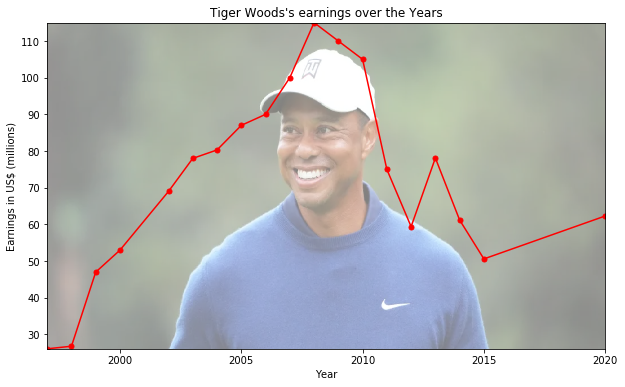

In [22]:
earnings_plot(df,'Tiger Woods',"tiger_woods.png",opacity=0.5)

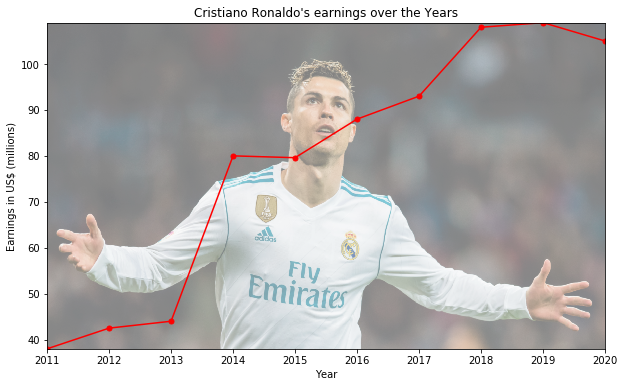

In [23]:
earnings_plot(df,'Cristiano Ronaldo',"ronaldo.png",opacity=0.5)